# LIGO - Gravitational Waves Detectability

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks")
from Utilities import plot_settings

Load downsampled data with balanced classes members

In [2]:
y = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\y_ds.npy")

In [3]:
data = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\data_ds.npy")

In [4]:
keys = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\keys.npy")

Text(0.5, 1.0, 'Boxplots of Features')

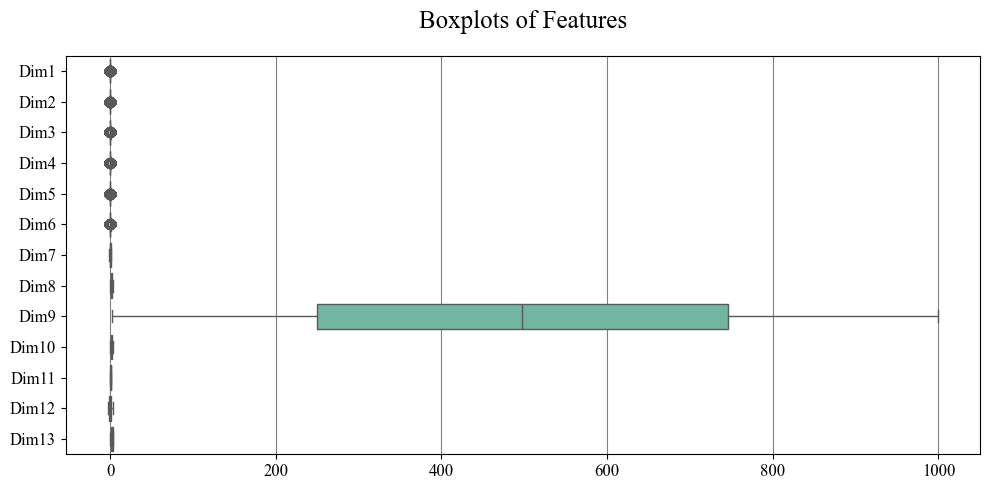

In [38]:
import seaborn as sns
import pandas as pd

# Convert to DataFrame for easier inspection
df = pd.DataFrame(data, columns=[f'Dim{i}' for i in range(1, 14)])

# Plot distributions
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of Features")

Seems like all the data are aligned with the $13^{th}$ dimension

In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [6]:
S = StandardScaler().fit_transform(data)
R = RobustScaler().fit_transform(data)

Text(0.5, 1.0, 'Standard Scaling')

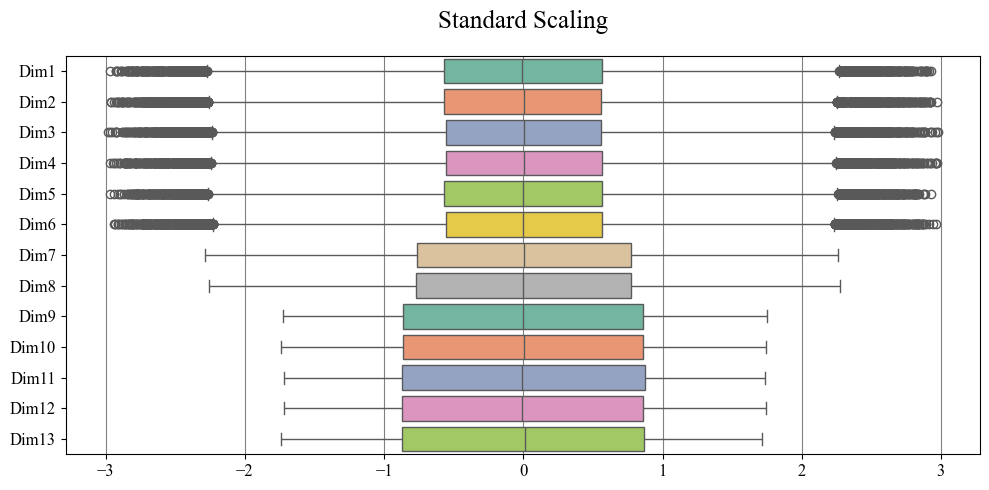

In [41]:
df = pd.DataFrame(S, columns=[f'Dim{i}' for i in range(1, 14)])

# Plot distributions
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Standard Scaling")

Text(0.5, 1.0, 'Robust scaling')

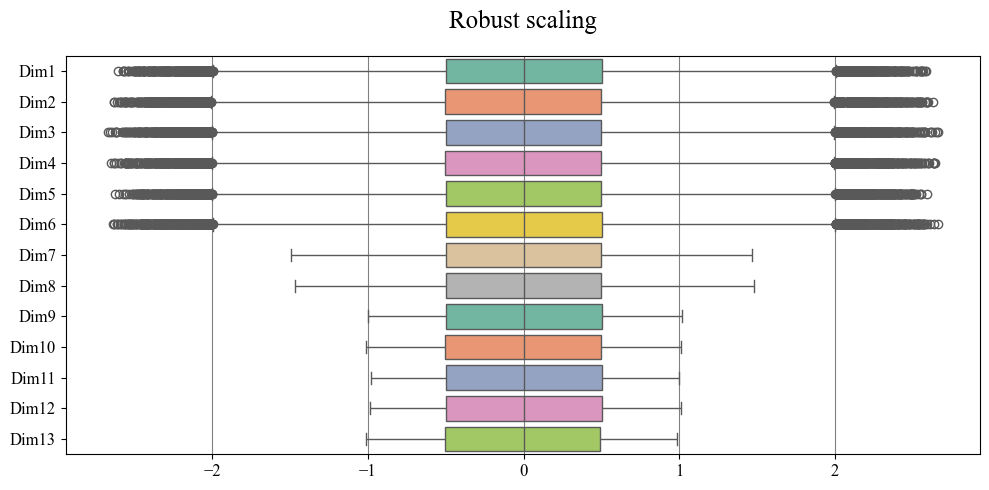

In [42]:
df = pd.DataFrame(R, columns=[f'Dim{i}' for i in range(1, 14)])

# Plot distributions
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Robust scaling")

I will use feature 12 vs feature 6 to visualize the classification algorithm results since there is less overlap between classes

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=13, random_state=42)
T = pca.fit_transform(S)

Text(0, 0.5, 'Explained variance ratio')

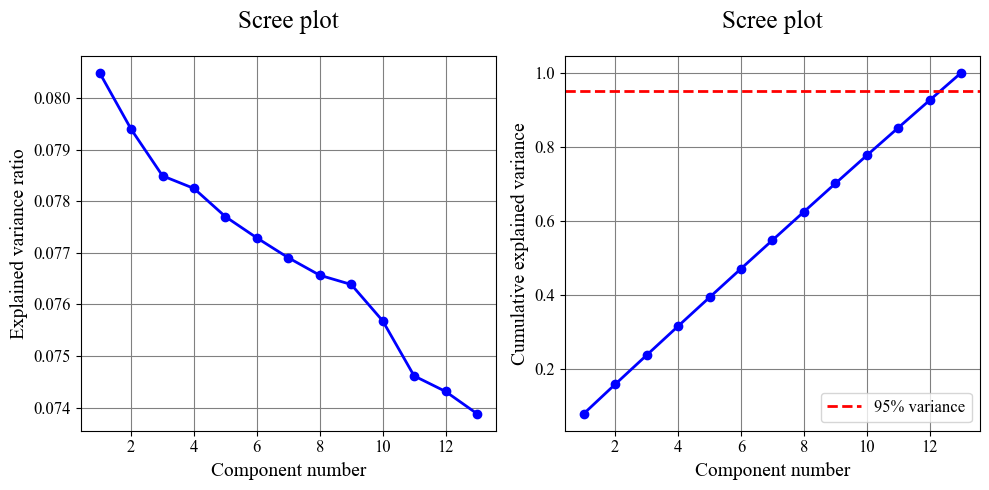

In [11]:
fig, axs = plt.subplots(1, 2)
axs[1].plot(range(1,S.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='blue')
axs[1].set_title('Scree plot')
axs[1].set_xlabel('Component number')
axs[1].axhline(0.95, 0, 1, linestyle='--', color='red', label='95% variance')
axs[1].set_ylabel('Cumulative explained variance')
axs[1].legend()

axs[0].plot(range(1,S.shape[1]+1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='blue')
axs[0].set_title('Scree plot')
axs[0].set_xlabel('Component number')
axs[0].set_ylabel('Explained variance ratio')

In [12]:
pca = PCA(n_components=13, random_state=42)
T = pca.fit_transform(R)

Text(0, 0.5, 'Explained variance ratio')

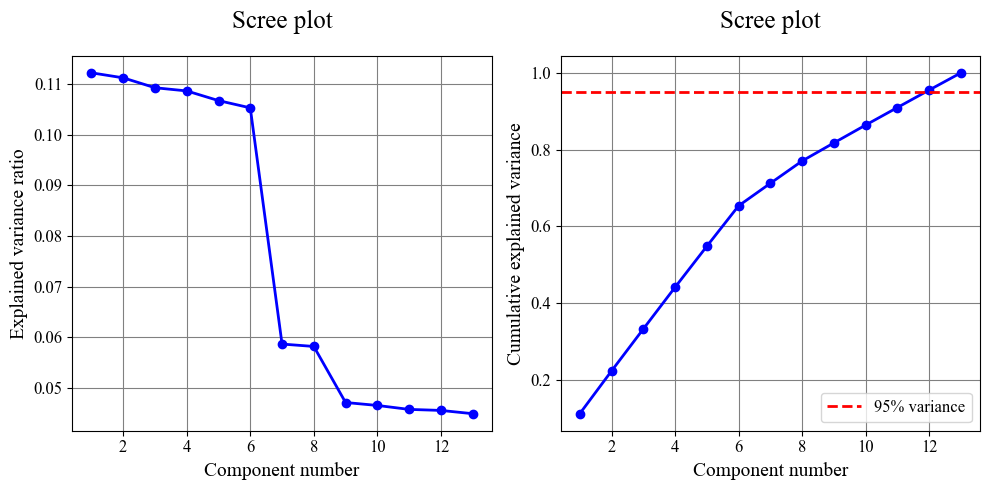

In [13]:
fig, axs = plt.subplots(1, 2)
axs[1].plot(range(1,T.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='blue')
axs[1].set_title('Scree plot')
axs[1].set_xlabel('Component number')
axs[1].axhline(0.95, 0, 1, linestyle='--', color='red', label='95% variance')
axs[1].set_ylabel('Cumulative explained variance')
axs[1].legend()

axs[0].plot(range(1,T.shape[1]+1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='blue')
axs[0].set_title('Scree plot')
axs[0].set_xlabel('Component number')
axs[0].set_ylabel('Explained variance ratio')

In [9]:
pca = PCA(n_components=13, random_state=42)
T = pca.fit_transform(R)

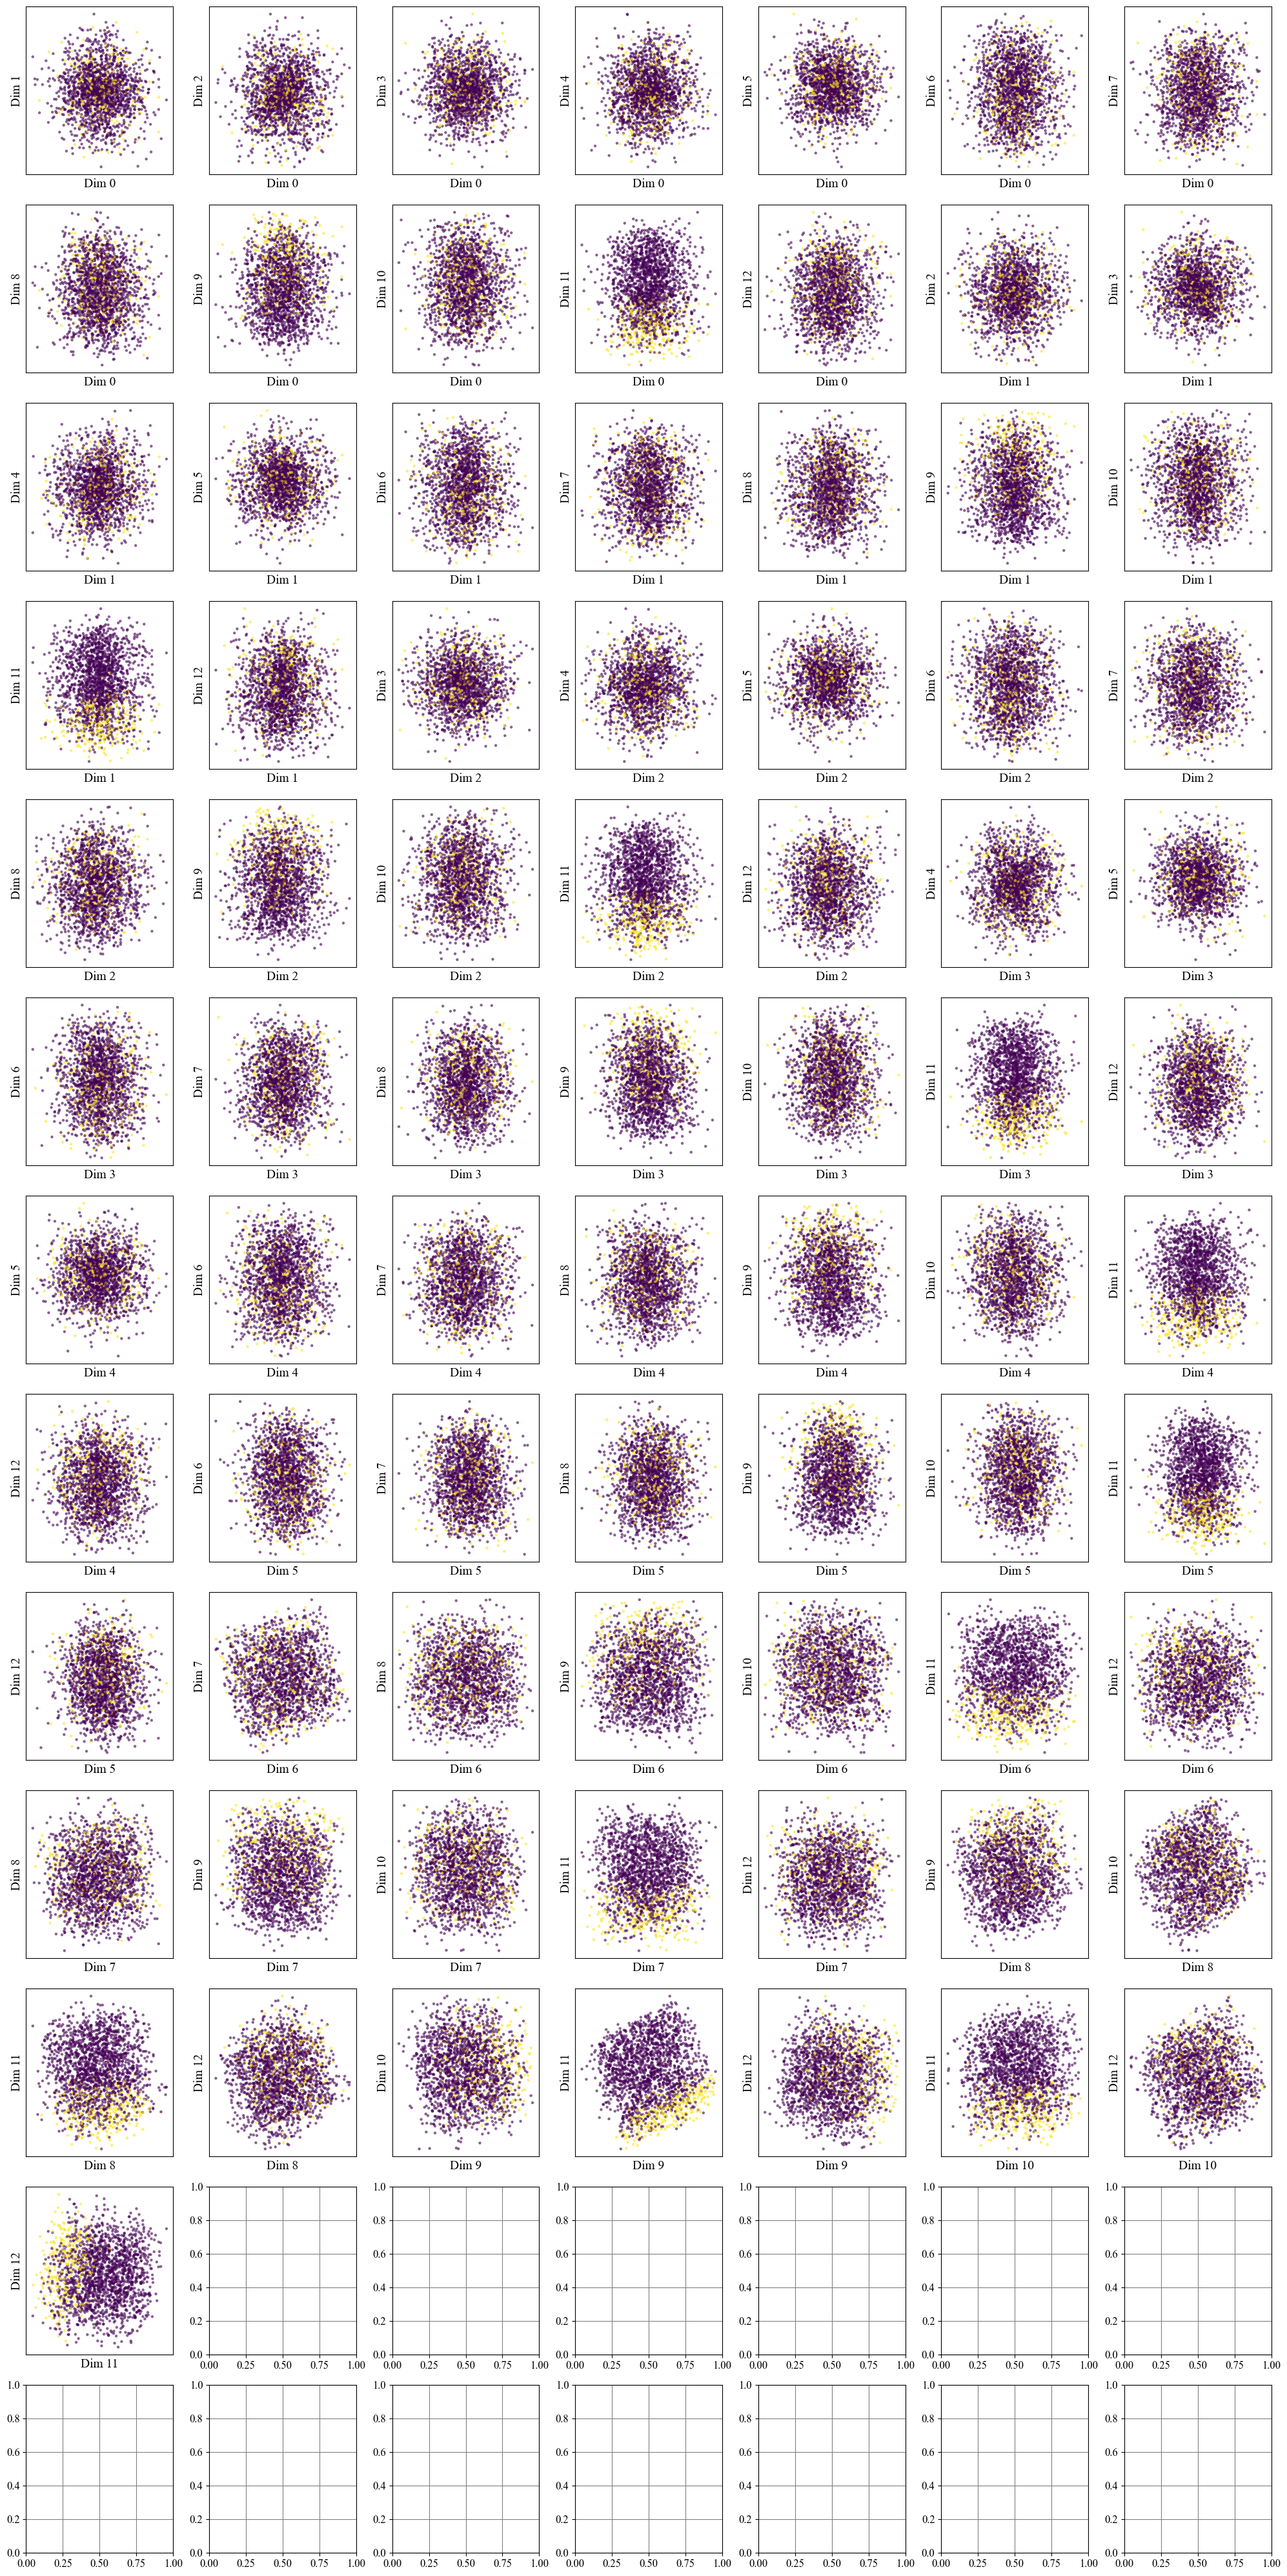

In [324]:
import itertools

# Use a smaller subset for visualization
idx = np.random.choice(len(T), size=2000, replace=False)
data_small = T[idx]
labels_small = y[idx]

dims = range(13)
pairs = list(itertools.combinations(dims, 2))

fig, axes = plt.subplots(13, 7, figsize=(20, 40))  # adjust depending on layout
axes = axes.flatten()

for i, (dim1, dim2) in enumerate(pairs):
    ax = axes[i]
    scatter = ax.scatter(data_small[:, dim1], data_small[:, dim2],
                         c=labels_small, cmap='viridis', s=5, alpha=0.5)
    ax.set_xlabel(f'Dim {dim1}')
    ax.set_ylabel(f'Dim {dim2}')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()

## Logistic Regression

In [14]:
from sklearn.model_selection import train_test_split
from Utilities.Classify_vs import evaluate_classifier_over_features, visualize_classification_generic_all, \
evaluate_classifier_over_features_all, visualize_classification_generic, plot_learning_curve, visualize_DT
from sklearn.linear_model import LogisticRegression as LR

In [15]:
#S_train, S_test, y_train, y_test = train_test_split(S, y, test_size=0.33, random_state=42)
S_train, S_test, y_train, y_test = train_test_split(T, y, test_size=0.33, random_state=42)

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...


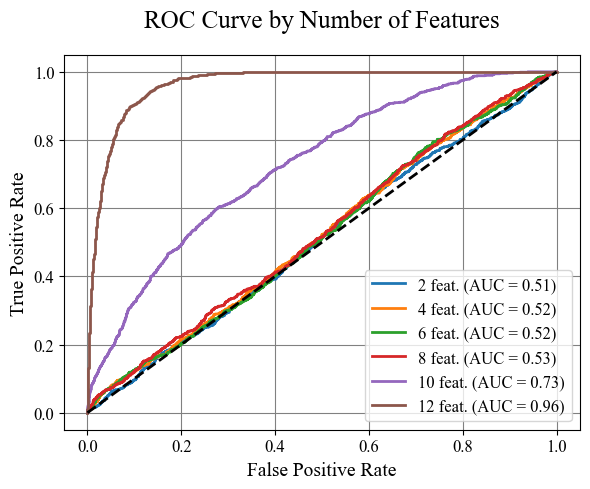

In [133]:
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, LR())

In [134]:
from sklearn.model_selection import learning_curve, KFold
custom_cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [135]:
train_sizes, train_scores, test_scores = learning_curve(result['best_classifier'], T, y, train_sizes=np.linspace(0.1, 1, 10), cv=custom_cv)

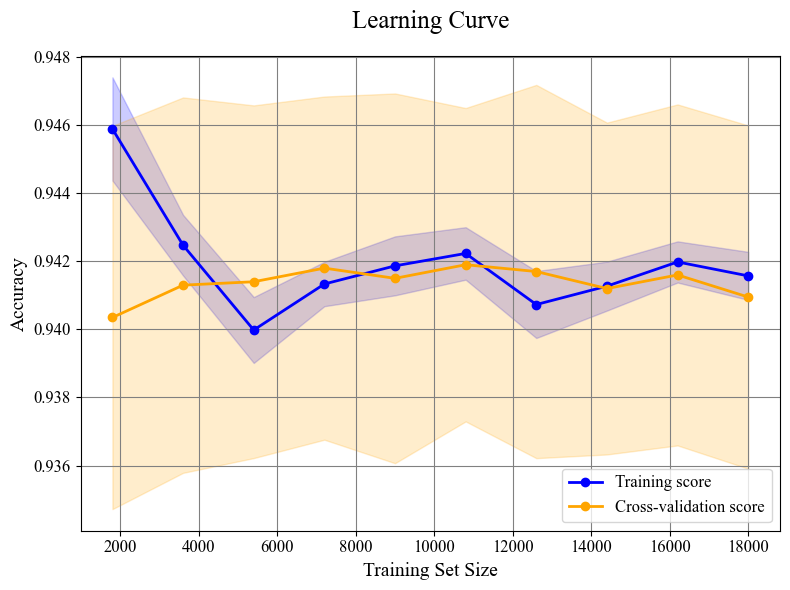

In [136]:
plot_learning_curve(train_sizes, train_scores, test_scores)

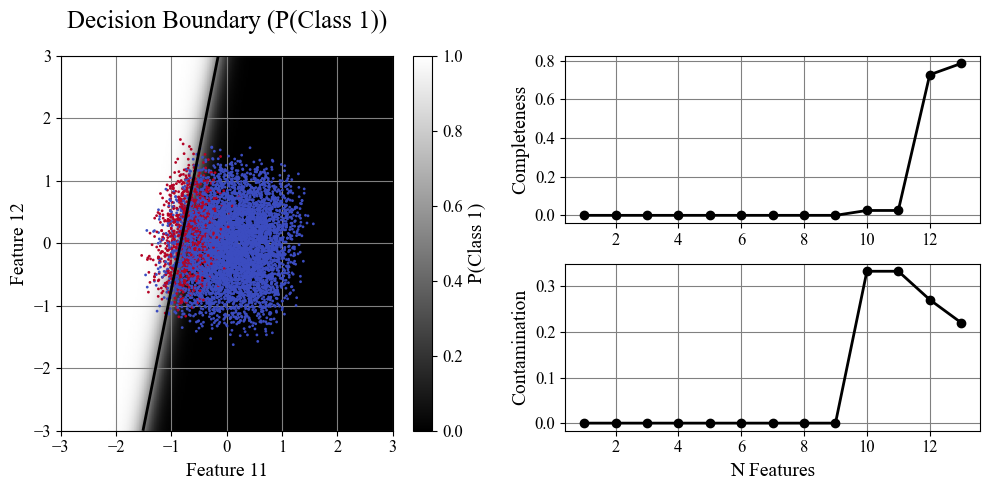

In [21]:
visualize_classification_generic(S_test[:, :result['best_n_features']], y_test, 
                                 result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], 
                                 result['contamination'][:result['best_n_features']], 
                                 limits=[-3,3,-3,3],
                                 f=1, a=12, b=11)

## Support Vector Machine

In [11]:
from sklearn.svm import SVC
clf = 0
clf = SVC(kernel='linear', C=1000)

In [ ]:
result = 0
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, clf)

Computing predictions using first 1 features...


**Takes too long...**

## Kernelization

Text(0.5, 0, 'Feature 1')

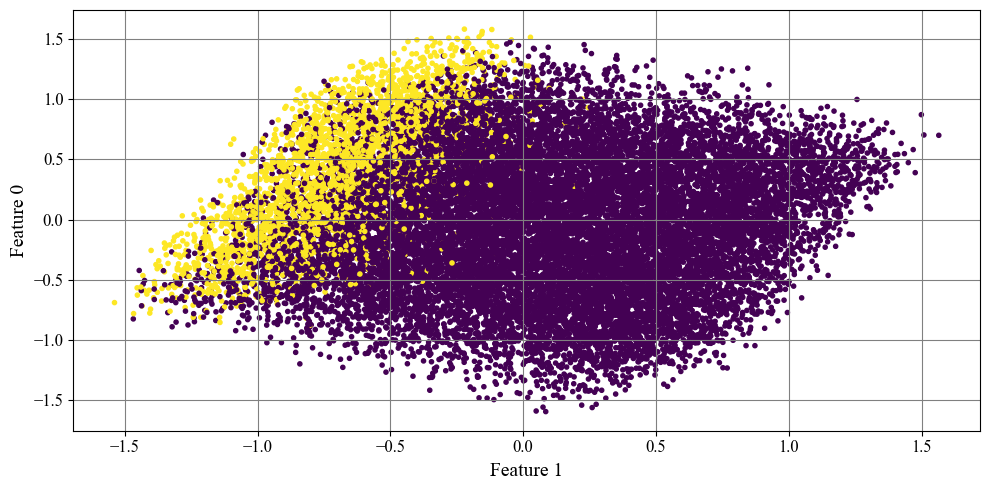

In [342]:
plt.scatter(T[:, 11], T[:,9], marker='.', c=y)
plt.ylabel('Feature 0')
plt.xlabel('Feature 1')

In [359]:
z = np.exp(-((T[:, 11]+0.5) ** 2 + (T[:, 9]+1) ** 2))

In [360]:
def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(T[:, 11], T[:, 9], z, c=y, s=50, cmap='spring', edgecolor='k')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

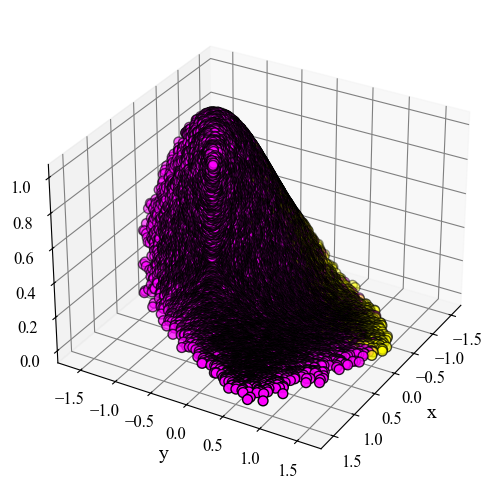

In [361]:
plot_3D()

In [363]:
A_train, A_test, y_train, y_test = train_test_split(A, y, test_size=0.33, random_state=42)

In [364]:
def plot_svc_decision_function(clf, ax=None, fixed_feature_value=0, fixed_feature_index=2):
    """
    Plot the decision function for a 3-feature SVC on the 2D plane of the other two features.

    Parameters:
    - clf: trained SVM classifier with 3 features
    - ax: matplotlib axis to plot on (optional)
    - fixed_feature_value: the constant value to fix for the third feature
    - fixed_feature_index: which feature index to fix (0, 1, or 2)
    """
    if ax is None:
        ax = plt.gca()

    # Determine which two features we will plot
    feature_indices = [0, 1, 2]
    feature_indices.remove(fixed_feature_index)
    i1, i2 = feature_indices

    # Create grid over the plotting features
    u = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    v = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    yy, xx = np.meshgrid(v, u)

    P = np.zeros_like(xx)

    # Evaluate the decision function on the grid, fixing the third feature
    for i, ui in enumerate(u):
        for j, vj in enumerate(v):
            x = np.zeros(3)
            x[i1] = ui
            x[i2] = vj
            x[fixed_feature_index] = fixed_feature_value
            P[i, j] = clf.decision_function(x.reshape(1, -1))[0]

    return ax.contour(xx, yy, P, colors='k',
                      levels=[-1, 0, 1], alpha=0.5,
                      linestyles=['--', '-', '--'])


Cross validate on C

In [376]:
from sklearn.metrics import confusion_matrix

def completeness_contamination(y_true, y_pred, positive_label=1):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, positive_label]).ravel()
    completeness = tp / (tp + fn) if (tp + fn) > 0 else 0
    contamination = fp / (tp + fp) if (tp + fp) > 0 else 0
    TNR = tn / (tn + fp)
    return completeness, contamination, TNR

In [365]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': np.linspace(1, 10, 10, dtype=int)}
grid_search = GridSearchCV(clf, param_grid, cv=custom_cv)  
grid_search.fit(A, y)
best_clf = grid_search.best_estimator_

In [367]:
print("Best C:", grid_search.best_params_['C'])
print("Best accuracy:", grid_search.best_score_)

Best C: 1
Best accuracy: 0.9199499999999998


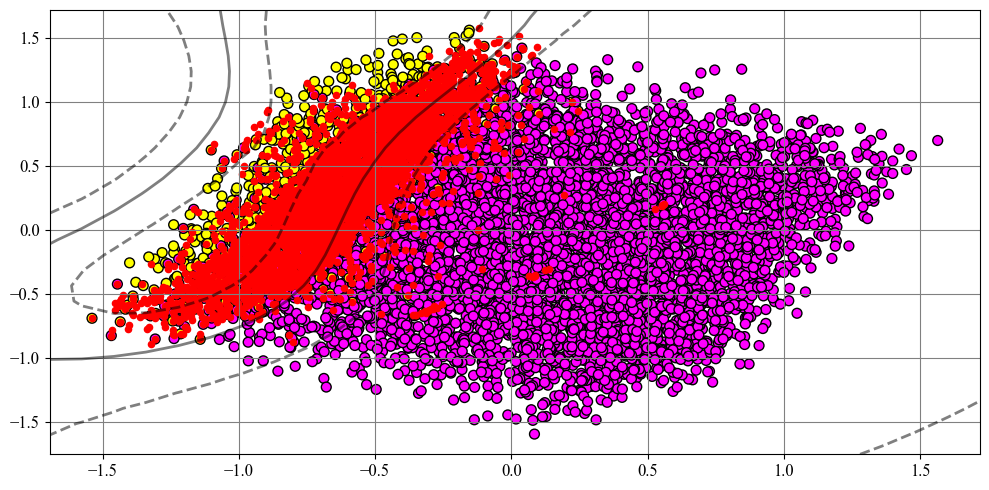

In [381]:
plt.scatter(A_test[:, 0], A_test[:, 1], c=y_test, s=50, cmap='spring', edgecolor='k')
plot_svc_decision_function(grid_search.best_estimator_)
plt.scatter(grid_search.best_estimator_.support_vectors_[:, 0], 
          grid_search.best_estimator_.support_vectors_[:, 1],
         s=20, facecolors='red');

In [377]:
a = completeness_contamination(y_train, grid_search.best_estimator_.predict(A_train))

In [378]:
b = completeness_contamination(y_test, grid_search.best_estimator_.predict(A_test))

In [379]:
a

(np.float64(0.6953405017921147),
 np.float64(0.27689030883919064),
 np.float64(0.9545732506333537))

In [380]:
b

(np.float64(0.7185354691075515),
 np.float64(0.27398843930635836),
 np.float64(0.9586098498078938))

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=100)

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...


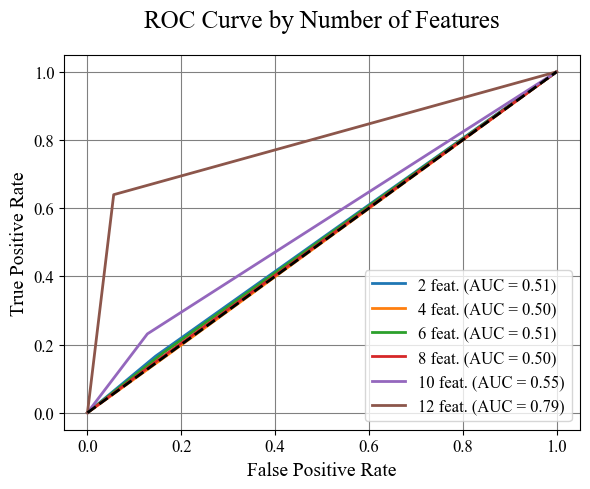

In [26]:
result = 0
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, clf)

In [61]:
from sklearn.tree import DecisionTreeClassifier as DTR

clf = DTR(criterion='entropy', max_depth=100, min_samples_split=2, min_samples_leaf=2, random_state=42)

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': list(np.linspace(1, 500, 5, dtype=int)),
    'min_samples_split': list(np.linspace(1, 10, 3, dtype=int)),
    'min_samples_leaf' : list(np.linspace(1, 10, 3, dtype=int))
}

# GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=custom_cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(S_train, y_train)

# Miglior modello e punteggio
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    

Best parameters: {'criterion': 'gini', 'max_depth': np.int64(125), 'min_samples_leaf': np.int64(10), 'min_samples_split': np.int64(5)}
Best accuracy: 0.9234328358208955


In [63]:
grid_search.best_estimator_.fit(S_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(125), min_samples_leaf=np.int64(10),
                       min_samples_split=np.int64(5), random_state=42)

In [64]:
def plot_decision_boundary(clf, X, y, feature_indices=(11, 12), axes=None, alpha=0.5, contour=True):
    f1, f2 = feature_indices
    X_mean = np.mean(X, axis=0)  # mean values to fix other features
    
    # Define axis ranges if not provided
    if axes is None:
        pad = 1.0
        x1_min, x1_max = X[:, f1].min() - pad, X[:, f1].max() + pad
        x2_min, x2_max = X[:, f2].min() - pad, X[:, f2].max() + pad
        axes = [x1_min, x1_max, x2_min, x2_max]
    
    # Create mesh grid for the 2 features
    x1s = np.linspace(axes[0], axes[1], 200)
    x2s = np.linspace(axes[2], axes[3], 200)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    # Create full 13D input for prediction (vary 2 features, fix others)
    X_full = np.tile(X_mean, (x1.size, 1))  # shape: (num_points, 13)
    X_full[:, f1] = x1.ravel()
    X_full[:, f2] = x2.ravel()
    
    # Predict using the full feature vectors
    y_pred = clf.predict(X_full).reshape(x1.shape)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap='grey')
    if contour:
        plt.contour(x1, x2, y_pred, cmap='grey', alpha=1)
    
    # Scatter original data (only the 2 features)
    plt.plot(X[y==0, f1], X[y==0, f2], "o", alpha=alpha, label="Class 0")
    plt.plot(X[y==1, f1], X[y==1, f2], "s", alpha=alpha, label="Class 1")
    
    plt.axis(axes)
    plt.xlabel(f"$x_{{{f1}}}$", fontsize=14)
    plt.ylabel(f"$x_{{{f2}}}$", fontsize=14, rotation=0)
    plt.title("Decision Boundary (projected)", fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()


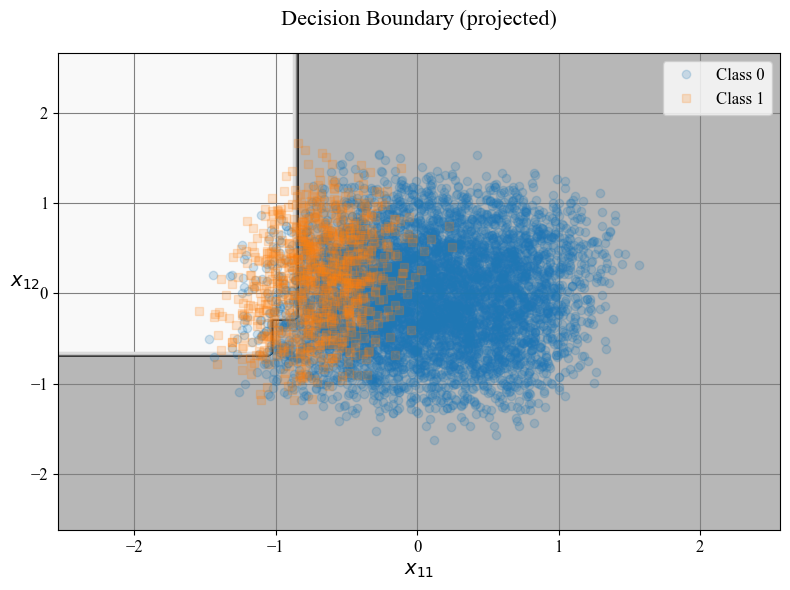

In [68]:
plot_decision_boundary(grid_search.best_estimator_, S_test, y_test, alpha=0.2)

## Bagging

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    n_estimators=500, max_samples=100, 
    bootstrap=True, random_state=42, n_jobs=-1)

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...


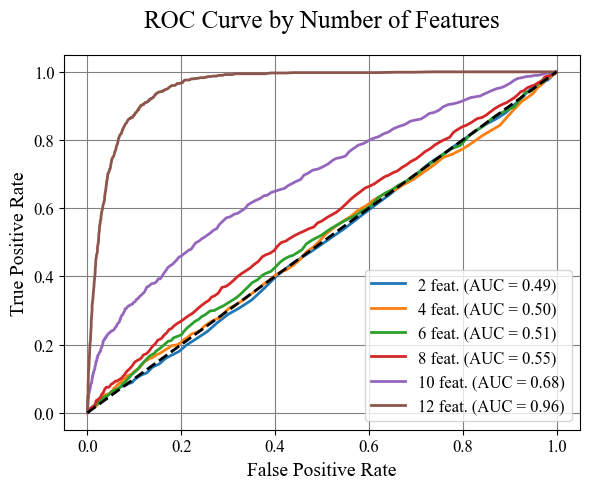

In [33]:
result = 0
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, bag_clf)

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_samples': [50, 100, 200]
}

# GridSearchCV
grid_search = GridSearchCV(bag_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(S_train, y_train)

# Miglior modello e punteggio
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'max_samples': 200, 'n_estimators': 500}
Best accuracy: 0.9314179104477611


In [42]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    n_estimators=500, max_samples=200, 
    bootstrap=True, random_state=42, n_jobs=-1)

In [45]:
bag_clf.fit(S_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=200, n_estimators=500, n_jobs=-1,
                  random_state=42)

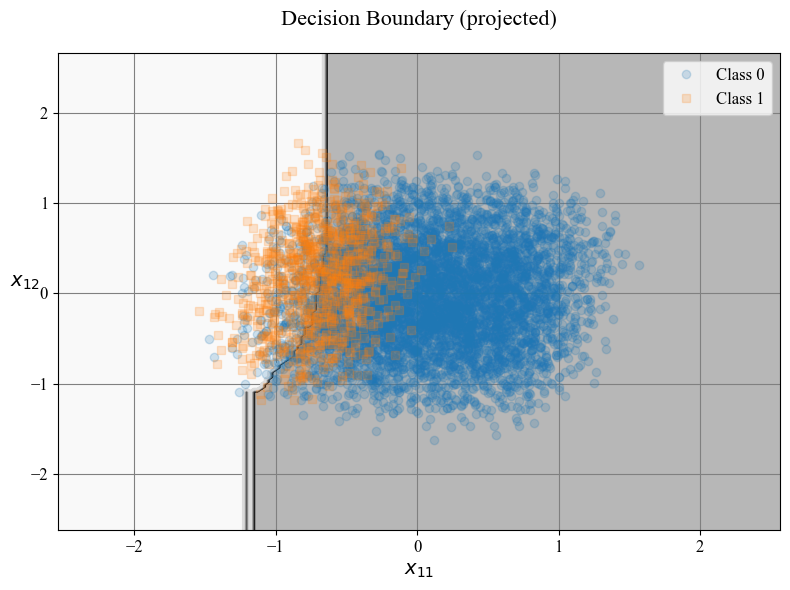

In [58]:
plot_decision_boundary(bag_clf, S_test, y_test, alpha=0.2)

## Boosting

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
from sklearn.metrics import confusion_matrix

def completeness_contamination(y_true, y_pred, positive_label=1):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, positive_label]).ravel()
    completeness = tp / (tp + fn) if (tp + fn) > 0 else 0
    contamination = fp / (tp + fp) if (tp + fp) > 0 else 0
    return completeness, contamination

from sklearn.metrics import root_mean_squared_error

def compute_metrics(N_boosts, max_depths, S_train, y_train, S_test, y_test):
    # Prepare containers for metrics with shape (len(N_boosts), len(max_depths))
    rms_train = np.zeros((len(N_boosts), len(max_depths)))
    rms_test = np.zeros((len(N_boosts), len(max_depths)))
    completeness_train = np.zeros((len(N_boosts), len(max_depths)))
    contamination_train = np.zeros((len(N_boosts), len(max_depths)))
    completeness_test = np.zeros((len(N_boosts), len(max_depths)))
    contamination_test = np.zeros((len(N_boosts), len(max_depths)))

    for i, Nb in enumerate(N_boosts):
        print('Nb:', Nb)
        for j, md in enumerate(max_depths):
            print('max_depth:', md)

            clf = GradientBoostingClassifier(
                loss='log_loss',
                learning_rate=0.1,
                n_estimators=Nb,
                max_depth=md,
                random_state=42
            )
            clf.fit(S_train, y_train)

            # Predict on training data
            y_pred_train = clf.predict(S_train)
            rms_train[i, j] = root_mean_squared_error(y_train, y_pred_train)
            comp_train, cont_train = completeness_contamination(y_train, y_pred_train, positive_label=1)
            completeness_train[i, j] = comp_train
            contamination_train[i, j] = cont_train

            # Predict on test data
            y_pred_test = clf.predict(S_test)
            rms_test[i, j] = root_mean_squared_error(y_test, y_pred_test)
            comp_test, cont_test = completeness_contamination(y_test, y_pred_test, positive_label=1)
            completeness_test[i, j] = comp_test
            contamination_test[i, j] = cont_test

    return {
        'rms_train': rms_train,
        'rms_test': rms_test,
        'completeness_train': completeness_train,
        'contamination_train': contamination_train,
        'completeness_test': completeness_test,
        'contamination_test': contamination_test
    }



In [127]:
Nboosts = [10, 100, 200, 500]
max_depths = [3, 5, 7, 10]
dictionary = compute_metrics(Nboosts, max_depths, S_train, y_train, S_test, y_test)

Nb: 10
max_depth: 3
max_depth: 5
max_depth: 7
max_depth: 10
Nb: 100
max_depth: 3
max_depth: 5
max_depth: 7
max_depth: 10
Nb: 200
max_depth: 3
max_depth: 5
max_depth: 7
max_depth: 10
Nb: 500
max_depth: 3
max_depth: 5
max_depth: 7
max_depth: 10


In [383]:
import seaborn as sns
def plot_metrics(N_boosts, max_depths, rms_train, rms_test,
                 completeness_train, completeness_test,
                 contamination_train, contamination_test):

    # Convert params to string labels for axes
    Nb_labels = [str(nb) for nb in N_boosts]
    md_labels = [str(md) for md in max_depths]

    fig, axs = plt.subplots(3, 2, figsize=(14, 12))

    sns.heatmap(rms_train, xticklabels=md_labels, yticklabels=Nb_labels, ax=axs[0,0], cmap='viridis')
    axs[0,0].set_title('Train RMS')
    axs[0,0].set_xlabel('Max Depth')
    axs[0,0].set_ylabel('N Boosts')

    sns.heatmap(rms_test, xticklabels=md_labels, yticklabels=Nb_labels, ax=axs[0,1], cmap='viridis')
    axs[0,1].set_title('Test RMS')
    axs[0,1].set_xlabel('Max Depth')
    axs[0,1].set_ylabel('N Boosts')

    sns.heatmap(completeness_train, xticklabels=md_labels, yticklabels=Nb_labels, ax=axs[1,0], cmap='coolwarm', vmin=0, vmax=1)
    axs[1,0].set_title('Train Completeness')
    axs[1,0].set_xlabel('Max Depth')
    axs[1,0].set_ylabel('N Boosts')

    sns.heatmap(completeness_test, xticklabels=md_labels, yticklabels=Nb_labels, ax=axs[1,1], cmap='coolwarm', vmin=0, vmax=1)
    axs[1,1].set_title('Test Completeness')
    axs[1,1].set_xlabel('Max Depth')
    axs[1,1].set_ylabel('N Boosts')

    sns.heatmap(contamination_train, xticklabels=md_labels, yticklabels=Nb_labels, ax=axs[2,0], cmap='coolwarm', vmin=0, vmax=1)
    axs[2,0].set_title('Train Contamination')
    axs[2,0].set_xlabel('Max Depth')
    axs[2,0].set_ylabel('N Boosts')

    sns.heatmap(contamination_test, xticklabels=md_labels, yticklabels=Nb_labels, ax=axs[2,1], cmap='coolwarm', vmin=0, vmax=1)
    axs[2,1].set_title('Test Contamination')
    axs[2,1].set_xlabel('Max Depth')
    axs[2,1].set_ylabel('N Boosts')

    plt.tight_layout()
    plt.show()

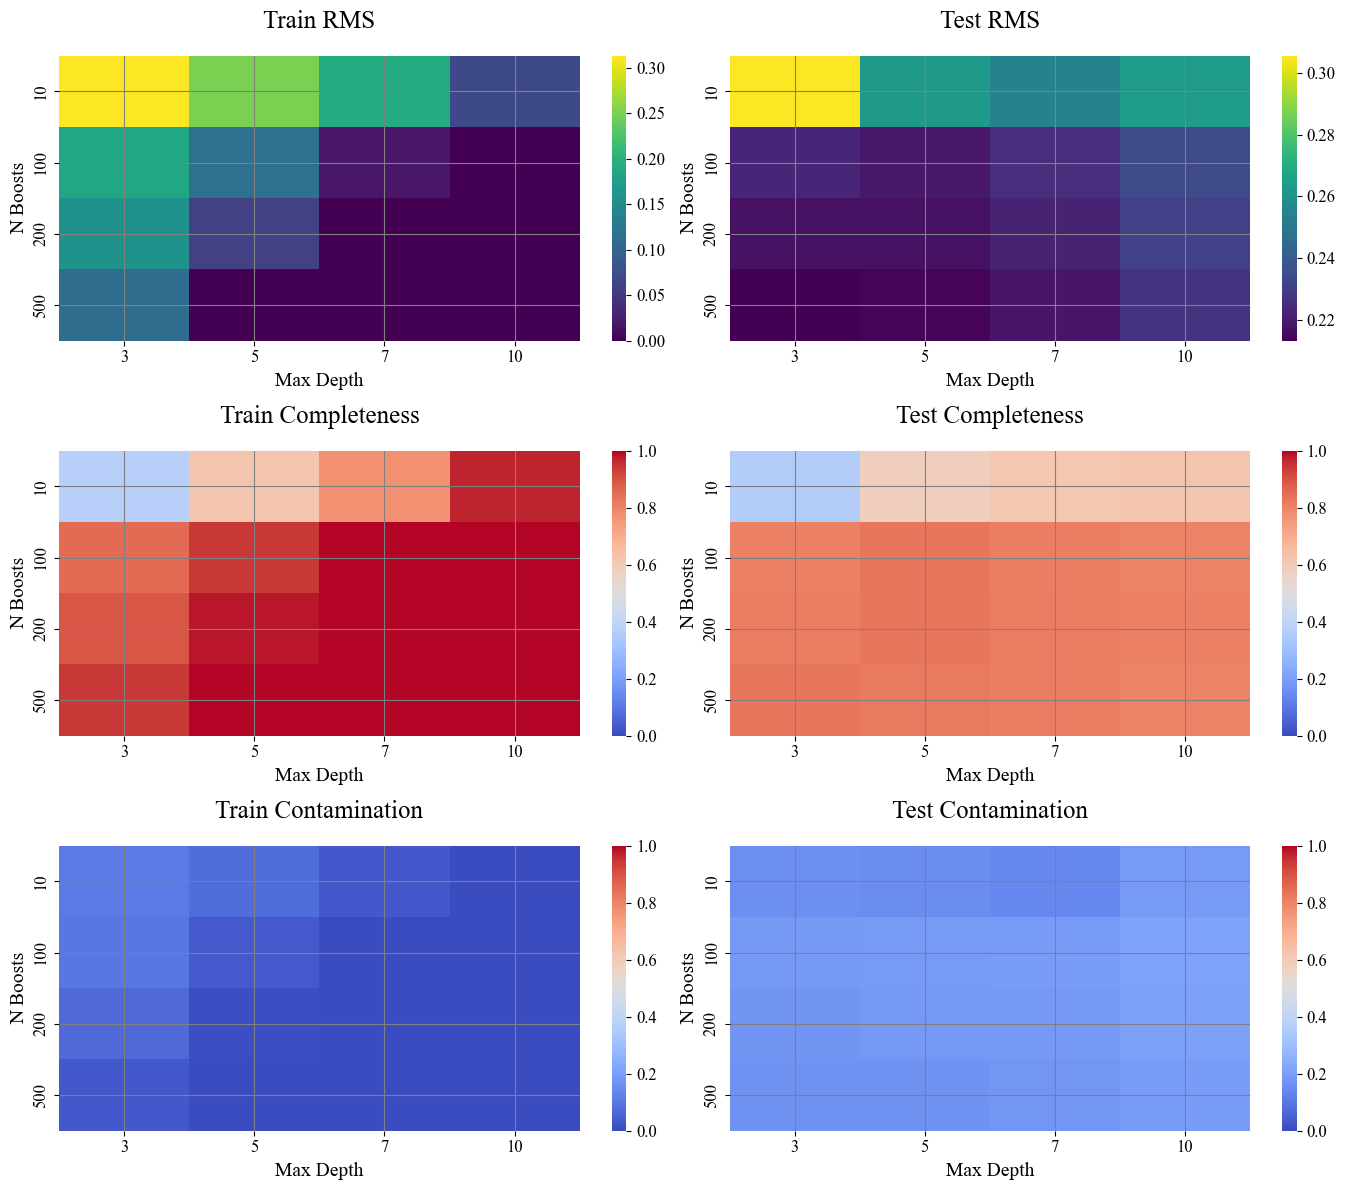

In [384]:
plot_metrics(Nboosts, max_depths, dictionary['rms_train'], 
             dictionary['rms_test'], 
             dictionary['completeness_train'],
             dictionary['completeness_test'], 
             dictionary['contamination_train'], 
             dictionary['contamination_test'])

In [387]:
g = GradientBoostingClassifier(loss='log_loss',
                               learning_rate=0.1,
                               n_estimators=300,
                               criterion='squared_error',
                               max_depth=7)

In [388]:
g.fit(S_train, y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=7,
                           n_estimators=300)

In [391]:
y_pred = g.predict(S_test)

In [392]:
a = completeness_contamination(y_test, y_pred)

In [396]:
print(f'Completeness : {a[0]:.2}')
print(f'Contamination : {a[1]:.2}')
print(f'True Negative Rate : {a[2]:.2}')

Completeness : 0.82
Contamination : 0.19
True Negative Rate : 0.97


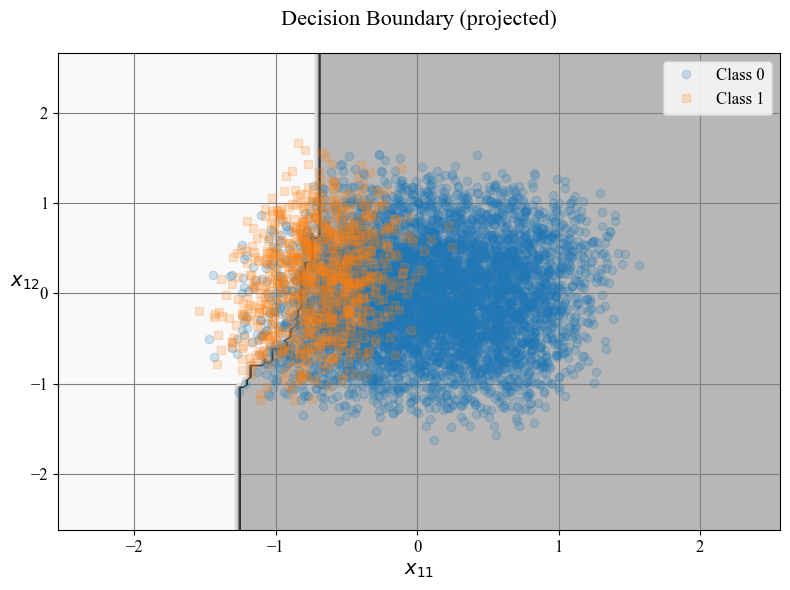

In [397]:
plot_decision_boundary(g, S_test, y_test, alpha=0.2)

In [399]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2}')

Accuracy: 0.95
